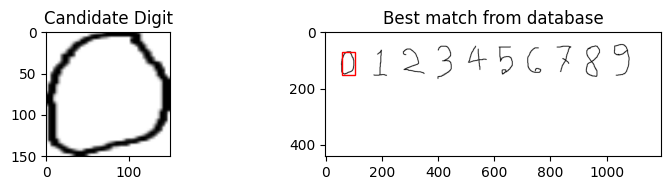

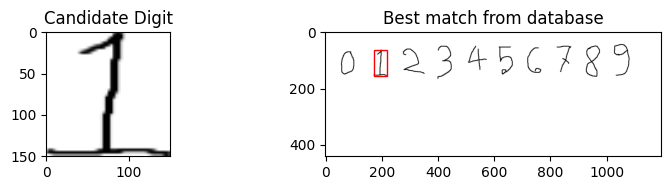

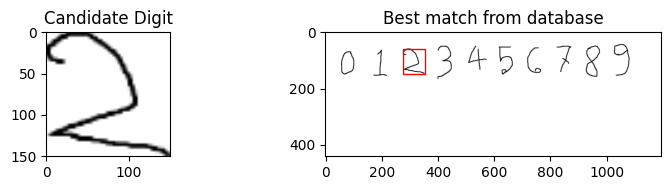

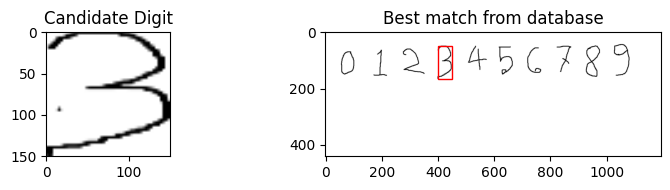

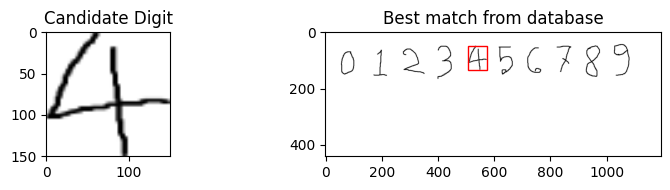

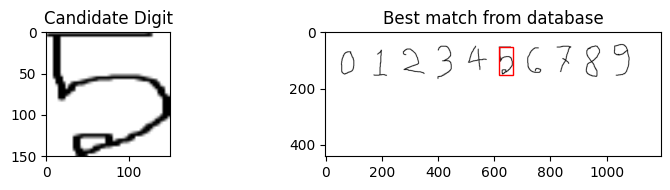

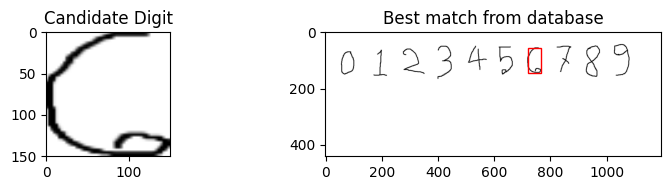

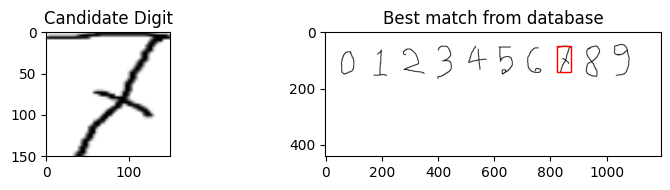

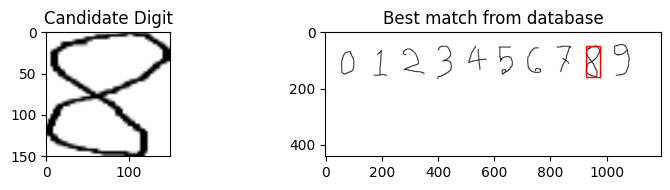

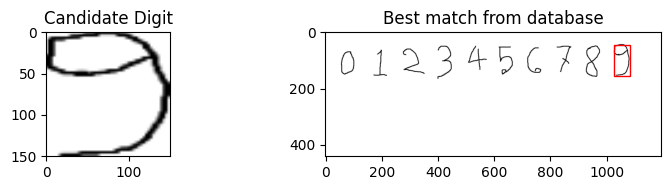

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_closest_digit(cand_img_path, test_img_path):
  cand_img = cv2.imread(cand_img_path)
  gray = cv2.cvtColor(cand_img, cv2.COLOR_BGR2GRAY)
  thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
  cand_contour = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
  cand_digit_contour = [contour for contour in cand_contour if cv2.contourArea(contour) > 50]
  digit_contour = cand_digit_contour[0]
  [x, y, w, h] = cv2.boundingRect(digit_contour)
  cand_digit = cand_img[y:y+h, x:x+w]
  cand_digit_resized = cv2.resize(cand_digit, (50, 50)) / 255.0
  cand_digit_array = cand_digit_resized.flatten()

  test_img = cv2.imread(test_img_path)
  gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
  thresh = cv2.adaptiveThreshold(gray, 255, cv2. ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
  contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
  digit_contours = [contour for contour in contours if cv2.contourArea(contour) > 50]
  digit_vectors = []

  for contour in digit_contours:
   [x, y, w, h] = cv2.boundingRect(contour)
   digit = test_img[y:y+h, x:x+w]
   resized = cv2.resize(digit, (50, 50)) / 255.0
   digit_vectors.append(resized.flatten())
  max_ncc = -float("inf")
  closest_digit = None

  mean_cand_digit = np.mean(cand_digit_array)
  std_cand_digit = np.std(cand_digit_array)

  for i in range(len(digit_vectors)):
   digit_vector = digit_vectors[i]
   digit_array = np.array(digit_vector)
   mean_digit = np.mean(digit_array)
   std_digit = np.std(digit_array)
   numerator = np.sum((cand_digit_array - mean_cand_digit) * (digit_array - mean_digit))
   denominator = std_cand_digit * std_digit
   ncc = numerator / denominator
   if ncc > max_ncc:
    max_ncc = ncc
    closest_digit = i  # Store the index of the closest digit
  return closest_digit, cand_digit_resized, test_img, digit_contours

# Paths to candidate and test images
candidate_paths = ['/content/drive/MyDrive/pr/0.PNG',
                   '/content/drive/MyDrive/pr/1.PNG',
                   '/content/drive/MyDrive/pr/2.PNG',
                   '/content/drive/MyDrive/pr/3.PNG',
                   '/content/drive/MyDrive/pr/4.PNG',
                   '/content/drive/MyDrive/pr/5.PNG',
                   '/content/drive/MyDrive/pr/6.PNG',
                   '/content/drive/MyDrive/pr/7.PNG',
                   '/content/drive/MyDrive/pr/8.PNG',
                   '/content/drive/MyDrive/pr/9.PNG']

test_img_path = '/content/drive/MyDrive/pr/temp.png'

for cand_path in candidate_paths:
    closest_digit, cand_digit_resized, test_img, digit_contours = find_closest_digit(cand_path, test_img_path)
    # print(f"Closest digit index for {cand_path}: {closest_digit}")
    cand_w = 150
    cand_h = 150
    h, w = cand_digit_resized.shape[:2]
    scale_w = cand_w / w
    scale_h = cand_h / h
    scale = min(scale_w, scale_h)
    cand_digit_resized = cv2.resize(cand_digit_resized, None, fx=scale, fy=scale)

    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    axes[0].imshow(cand_digit_resized, cmap='gray')
    axes[0].set_title('Candidate Digit')
    axes[0].set_xlim(0, cand_w)
    axes[0].set_ylim(cand_h, 0)

    test_img_copy = test_img.copy()  # Create a copy of the test image
    [x, y, w, h] = cv2.boundingRect(digit_contours[closest_digit])
    rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none')
    axes[1].imshow(test_img_copy, cmap='gray')  # Show the copy of the test image
    axes[1].set_title('Best match from database')
    axes[1].add_patch(rect)

    plt.tight_layout()
    plt.show()